<a href="https://colab.research.google.com/github/oooAriel/tz2553_text_final-project/blob/main/Text_analysis_finalproject_tz2553.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Trends of News articles’ Sentiment
## -News articles on public attitude toward US-China trade war

# Abstract
The purpose of this study is to utilize natural language processing to analyze the sentiment trends of news articles regarding public attitudes toward the US-China trade war. Since sentiment analysis enables audiences to comprehend public opinions, policymakers' sentiments, and news perception in real time, it facilitates data-driven decision-making. As a crucial link between the public and policymakers, it is essential to accurately gauge the sentiment of the story.

To address the research question, 'What is the sentiment and main concerns associated with news articles on public attitudes toward the US-China trade war, as reflected in the analyzed articles from 2019 to 2023, and how does it change before and after Covid?' I analyze the content of various articles using Python's Natural Language Toolkit (NLTK), sentiment analysis, and word cloud visualizations.

The findings reveal a negative sentiment of news articles on public attitude toward the US-China trade war, and the word cloud illustrates the most prevalent issues associated with the trade war, providing insight into a discernible trend over time. The study concludes that the sentiment of news articles on public attitudes towards the US-China trade war is not as neutral as expected and shows a trend closely related to the political relationship between the two countries.

# Introduction
The US-China trade war refer to the economic conflict between China and the United States since January 2018, when U.S. President Donald Trump began setting tariffs and other trade barriers on China with the goal of forcing it to make changes to what the U.S. says are longstanding unfair trade practices and intellectual property theft.The Covid from 2019 has certain impact on the trade relation as well.

Public attitude plays a crucial role in the context of a trade war for several reasons. Firstly, public sentiment can influence consumer behavior[(Jill J. McCluskey,2016)](https://www.annualreviews.org/doi/10.1146/annurev-resource-100913-012630), impacting the demand for products and consequently affecting businesses. Secondly, public perception can shape political opinions and impact policymakers' decisions[(Pew Rearch Center, 2015)](https://www.pewresearch.org/politics/2015/11/23/8-perceptions-of-the-publics-voice-in-government-and-politics/), potentially influencing trade policies and negotiations. Lastly, in an era of information dissemination, public sentiment can be reflected and amplified through various media channels, including journalism.

Journalism, as the bridge between the public and policymakers, has a responsibility to accurately capture and convey public sentiment in articles related to trade wars. Understanding and incorporating public attitudes into reporting can provide a more nuanced and comprehensive analysis of the economic and social implications of trade disputes. Journalists should strive to present a balanced view [(Lydia Duperier,2022)](https://pepperdine-graphic.com/opinion-its-important-to-consume-balanced-media/) , considering diverse perspectives and ensuring that the public is well-informed about the potential consequences of trade tensions. Journalism is a tool not only for informing the public but also for fostering a more informed and engaged citizenry in the midst of complex economic challenges.

The research paper will utilize data science techniques to delve into the sentiment of news articles on public attitude toward US-China trade war under the broader context of Covid.To achieve this, I analyze content from various articles to understand the sentiment and the trend.

# Research Questions:
RQ1: What is the sentiment of the news articles on public attitude toward US-China trade war, as reflected in the analyzed articles from 2019 to 2023?

RQ2: What are the main concerns and themes related to the news articles selected, as evidenced by the word cloud visualization?


# Hypothesis:
The collective sentiment portrayed in the news articles regarding the public's stance on the US-China trade war appears to be predominantly neutral. However, with the exacerbation of the COVID-19 pandemic, there is a likelihood of a discernible negative sentiment trend in the discourse spanning from 2019 to 2023 concerning the relationship between the United States and China in the realm of trade.

# Literature Review
The following articles randomly selected from 2019 to 2023 as our data sources:

2019: CNBC: ‘More Americans disapprove of Trump’s trade policies than are in favor, CNBC All-America Survey finds’, url:  
https://www.cnbc.com/2019/05/31/most-americans-dont-approve-of-trumps-trade-policies-cnbc-all-america-survey-finds.html

2020: Gallup: ‘Americans' Views on Trade in the Trump Era’. url:
https://news.gallup.com/opinion/gallup/267770/americans-views-trade-trump-era.aspx

2021: The Washington Post: ‘U.S. tariffs on Chinese goods didn’t bring companies back to the U.S., new research finds’, url:
https://www.washingtonpost.com/politics/2021/09/22/us-tariffs-chinese-goods-didnt-bring-companies-back-us-new-research-finds/

2022: The Wall Street Journal: ‘Who Won the U.S.-China Trade War?’, url:
https://www.wsj.com/articles/who-won-the-u-s-china-trade-war-11653059611

2023: Morning Consult: ‘U.S.-China Relations Barometer’, url:
https://pro.morningconsult.com/trackers/tracking-us-china-relations

For the codes used in this paper, I mainly adopt the method from the lecture and the tutorial material, I designed some code frame with the help of ChatGPT.

# Methodology
I used a similar approach for all five articles, so I'll explain the process by going through one of them.

Data Preprocessing

First, I created a text processing framework called `text_preprocessing` using a Python function. This function is designed to clean and transform raw text data for better analysis or machine learning. The steps include lowercasing, removing numbers and special characters, tokenization, removing stop words, and handling non-alphabetic characters and extra whitespaces. The function returns the final processed text.

Word Frequency

For word frequency analysis, I tokenized the processed article, counted word occurrences, and calculated weights based on each word's frequency. Using the [`Counter` class](https://realpython.com/python-counter/), I determined the total number of words and assigned weights to each word. The results were organized in a DataFrame, sorted in descending order by word counts, and the top 20 words were displayed with their weights and weighted counts. This analysis helps identify the most significant words in the text. Additionally, a horizontal bar plot for the top 20 words and a Word Cloud visualization were generated for a more accessible representation of the findings.

Sentiment Analysis

I used the VADER (Valence Aware Dictionary) sentiment analysis tool from the NLTK library to analyze the sentiment of the articles. Besides, through creating a dataframe, I can clearly list the sentiment score of the sentences in the article obtained by Tokenize. At the end, I did a average sentiment score cauculation to compare across the ariticles.

# 2019: CNBC: ‘More Americans disapprove of Trump’s trade policies than are in favor, CNBC All-America Survey finds’

In [ ]:
!pip install requests beautifulsoup4 nltk matplotlib vaderSentiment wordcloud numpy Pillow

# Import required libraries
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Function for text preprocessing and I self-designed this function
def text_preprocessing(document_text):
  #Converts all text to lowercase
    doc_text = document_text.lower()
    #removing numbers
    doc_text = re.sub(r'\d+', '', doc_text)
    #removing Special Characters
    doc_text = re.sub('\W+', ' ', doc_text)

    #Uses regular expressions to tokenize the processed text into individual words.
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc_text)

  #Removing Stop Words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_tokens) #Joins the filtered tokens back into a single string

    processed_text = re.sub(r'[^a-zA-Z\s]', '', processed_text) #Removes any characters that are not letters or spaces
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text

# URL of the new article
fir_url = "https://www.cnbc.com/2019/05/31/most-americans-dont-approve-of-trumps-trade-policies-cnbc-all-america-survey-finds.html"

# Get HTML content
fir_response = requests.get(fir_url)
fir_html_string = fir_response.text

# Parse HTML content
fir_soup = BeautifulSoup(fir_html_string, 'html.parser')
fir_article = fir_soup.get_text()

# Preprocess text
fir_processed_article = text_preprocessing(fir_article)

# Display processed text
print(fir_processed_article)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


americans approve trump trade policies cnbc america survey findsskip navigationwatchlivemarketspre marketsu marketscurrenciescryptocurrencyfutures commoditiesbondsfunds etfsbusinesseconomyfinancehealth sciencemediareal estateenergyclimatetransportationindustrialsretailwealthsportslifesmall businessinvestingpersonal financefintechfinancial advisorsoptions actionetf streetbuffett archiveearningstrader talktechcybersecurityenterpriseinternetmediamobilesocial mediacnbc disruptor tech guidepoliticswhite housepolicydefensecongressequity opportunitycnbc tvlive tvlive audiobusiness day showsentertainment showsfull episodeslatest videotop videoceo interviewscnbc documentariescnbc podcastscnbc worlddigital originalslive tv schedulewatchlistinvesting clubtrust portfolioanalysistrade alertsmeeting videoshomestretchjim columnseducationsubscribesign inpropro newspro livestock screenermarket forecastoptions investingsubscribesign inmenumake itselectall selectcredit cards loans banking mortgages insur

View only the top 20 words in the DataFrame and visualize

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Tokenize the processed text
tokens = fir_processed_article.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Calculate the total number of words
total_words = sum(word_counts.values())

# Calculate weights (for simplicity, using equal weights)
weights = {word: count*100 / total_words for word, count in word_counts.items()}

# Calculate weighted counts
weighted_counts = {word: count * weights[word] for word, count in word_counts.items()}

# Create a DataFrame from the word counts and add weighted columns
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
df_word_counts['Frequency'] = df_word_counts['Word'].map(weights)
df_word_counts['WeightedCount_percent'] = df_word_counts['Count'] * df_word_counts['Frequency']

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Display the top 20 words with weights and weighted counts
fir_top_20_words = df_word_counts.head(20)
print(fir_top_20_words)


             Word  Count  Frequency  WeightedCount_percent
63         credit     25   3.101737              77.543424
7          survey     15   1.861042              27.915633
2           trump     13   1.612903              20.967742
5            cnbc     10   1.240695              12.406948
67          small     10   1.240695              12.406948
0       americans      9   1.116625              10.049628
212         china      9   1.116625              10.049628
59          loans      9   1.116625              10.049628
65       personal      9   1.116625              10.049628
194      economic      9   1.116625              10.049628
110  accountsbest      9   1.116625              10.049628
3           trade      9   1.116625              10.049628
6         america      8   0.992556               7.940447
259           say      7   0.868486               6.079404
207     president      7   0.868486               6.079404
219        public      7   0.868486               6.0794

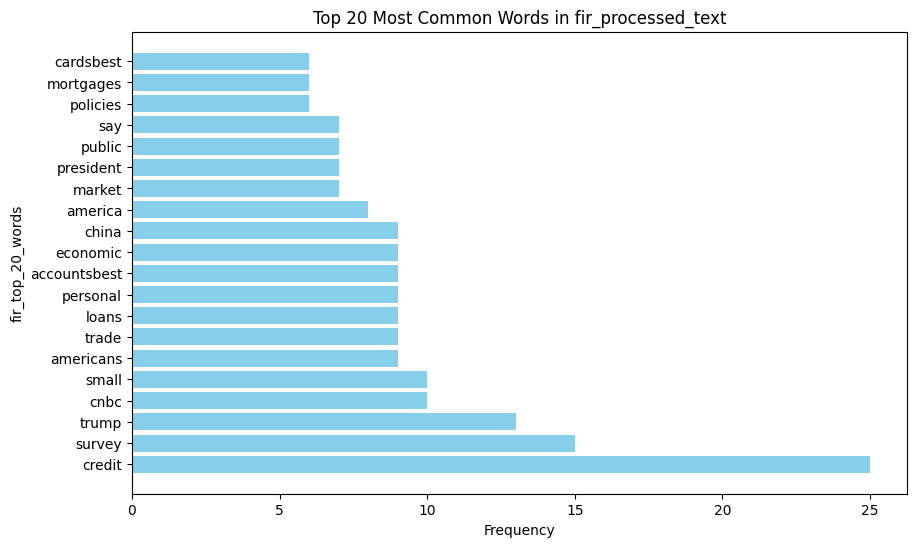

In [ ]:
# Tokenizer for fir_processed_text
tokenizer = RegexpTokenizer(r'\w+')

# Generate a horizontal bar plot for the top 20 words in 'fir_processed_text'
tokens_fir = tokenizer.tokenize(fir_processed_article)
word_counts_fir = Counter(tokens_fir)
top_words_fir = word_counts_fir.most_common(20)
words, frequencies = zip(*top_words_fir)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(words, frequencies, color='skyblue')
ax.set_xlabel('Frequency')
ax.set_ylabel('fir_top_20_words')
ax.set_title('Top 20 Most Common Words in fir_processed_text')

plt.show()

In [ ]:
!pip install matplotlib numpy

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

### Word Cloud

using the code below to use the WordCloud class from the wordcloud library, along with other libraries such as numpy, PIL (Python Imaging Library), and matplotlib.pyplot, to generate a word cloud visualization based on the provided text.

In [ ]:
!pip install wordcloud numpy Pillow matplotlib

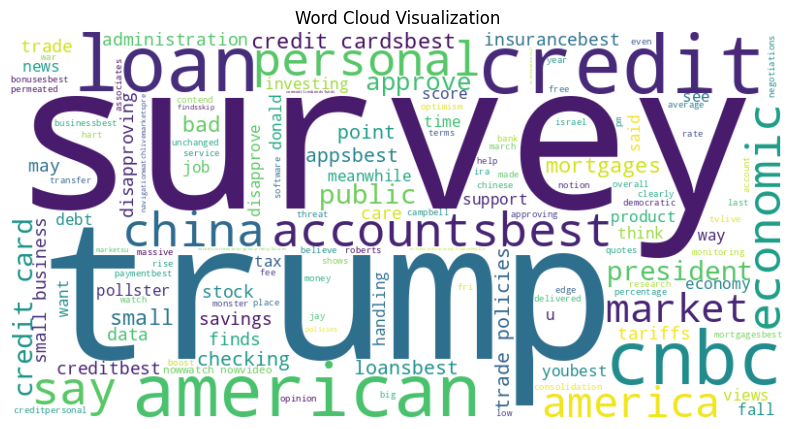

In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Generate Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(fir_processed_article)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Visualization')
plt.show()



### Sentiment Analysis

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


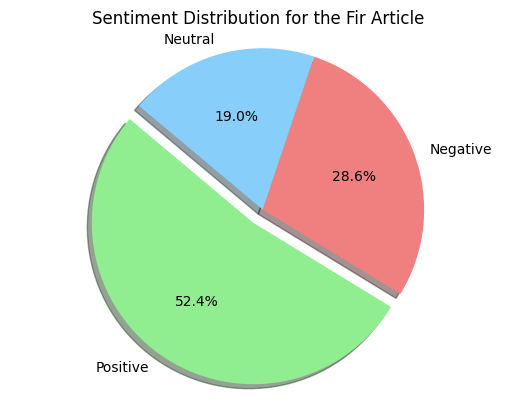

In [ ]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

# Download the required NLTK resource
nltk.download('punkt')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Tokenize the text into sentences
fir_sentences = sent_tokenize(fir_article)

# Calculate sentiment scores for each sentence
fir_sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in fir_sentences]

# Classify sentiments into positive, negative, and neutral
fir_positive = sum(score > 0.05 for score in fir_sentiment_scores)
fir_negative = sum(score < -0.05 for score in fir_sentiment_scores)
fir_neutral = len(fir_sentiment_scores) - fir_positive - fir_negative

# Plot a pie chart for sentiment distribution
fir_labels = 'Positive', 'Negative', 'Neutral'
fir_sizes = [fir_positive, fir_negative, fir_neutral]
fir_colors = ['lightgreen', 'lightcoral', 'lightskyblue']
fir_explode = (0.1, 0, 0)

plt.pie(fir_sizes, explode=fir_explode, labels=fir_labels, colors=fir_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution for the Fir Article')
plt.show()


In [ ]:
df = pd.DataFrame({'Sentence': fir_sentences, 'Sentiment Score': fir_sentiment_scores})

print(df)

                                             Sentence  Sentiment Score
0   Most Americans don't approve of Trump's trade ...           0.0000
1   MarketsCurrenciesCryptocurrencyFutures & Commo...           0.9933
2   "The notion that China is this massive economi...          -0.8657
3   Most say they don't even see China as an econo...           0.6808
4   It shows 40% of the public approves of the job...           0.4019
5   The quarterly survey of 800 Americans nationwi...          -0.4019
6   The survey took place between May 22 and May 2...           0.0772
7   But that's not the case for views on how the p...          -0.5927
8   They are about as bad again for Trump's handli...           0.3612
9   But that support falls off by 20 to 30 percent...           0.5499
10  In 2007, when CNBC first asked the question, 5...           0.4215
11  Now 57% say they don't care, up from 39% who s...          -0.5897
12  A 52% majority of Americans think the job mark...           0.7184
13  A 

#2020: Gallup: ‘Americans' Views on Trade in the Trump Era’

In [ ]:
# Install necessary libraries
!pip install requests beautifulsoup4 nltk matplotlib vaderSentiment wordcloud numpy Pillow

# Import required libraries
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Function for text preprocessing
def text_preprocessing(document_text):
    doc_text = document_text.lower()
    doc_text = re.sub(r'\d+', '', doc_text)
    doc_text = re.sub('\W+', ' ', doc_text)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_tokens)

    processed_text = re.sub(r'[^a-zA-Z\s]', '', processed_text)
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text

# URL of the new article
sec_url = "https://news.gallup.com/opinion/gallup/267770/americans-views-trade-trump-era.aspx"

# Get HTML content
sec_response = requests.get(sec_url)
sec_html_string = sec_response.text

# Parse HTML content
sec_soup = BeautifulSoup(sec_html_string, 'html.parser')
sec_article = sec_soup.get_text()

# Preprocess text
sec_processed_article = text_preprocessing(sec_article)

# Display processed text
print(sec_processed_article)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


americans views trade trump era notice javascript enabled please enable javascript safely skip main content us locations careers contact us subscribe consulting expertise employee engagement create culture ensures employees involved enthusiastic highly productive work workplace employee experience analyze improve experiences across employee life cycle people organization thrive leadership identify enable future ready leaders inspire exceptional performance culture transformation understand culture define one want make organizational identity competitive advantage customer centricity put customer core every part organization deliver exceptional experiences grow business organizational effectiveness ensure right strategy culture people structure processes place achieve goals services solutions featured cliftonstrengths assessment gallup access platform q survey gallup world poll leading strengths books workplace solutions learn develop engage employees create exceptional workplace boost 

In [ ]:
import pandas as pd
from collections import Counter

# Tokenize the processed text
tokens = sec_processed_article.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Calculate the total number of words
total_words = sum(word_counts.values())

# Calculate weights (for simplicity, using equal weights)
weights = {word: count * 100 / total_words for word, count in word_counts.items()}

# Calculate weighted counts
weighted_counts = {word: count * weights[word] for word, count in word_counts.items()}

# Create a DataFrame from the word counts and add weighted columns
df_word_counts = pd.DataFrame(word_counts.items(), columns=['sec_Word', 'sec_Count'])
df_word_counts['sec_Weight'] = df_word_counts['sec_Word'].map(weights)
df_word_counts['WeightedCount_percent'] = df_word_counts['sec_Count'] * df_word_counts['sec_Weight']

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='sec_Count', ascending=False)

# Display the top 20 words with weights and weighted counts
sec_top_20_words = df_word_counts.head(20)
print(sec_top_20_words)

      sec_Word  sec_Count  sec_Weight  WeightedCount_percent
2        trade         56    3.465347             194.059406
232          u         47    2.908416             136.695545
84      gallup         41    2.537129             104.022277
0    americans         35    2.165842              75.804455
3        trump         19    1.175743              22.339109
277      china         17    1.051980              17.883663
171    economy         16    0.990099              15.841584
278    tariffs         16    0.990099              15.841584
285     effect         11    0.680693               7.487624
307  important         11    0.680693               7.487624
80   solutions         10    0.618812               6.188119
21    employee         10    0.618812               6.188119
255   positive         10    0.618812               6.188119
56        make         10    0.618812               6.188119
169    foreign          9    0.556931               5.012376
89       world          

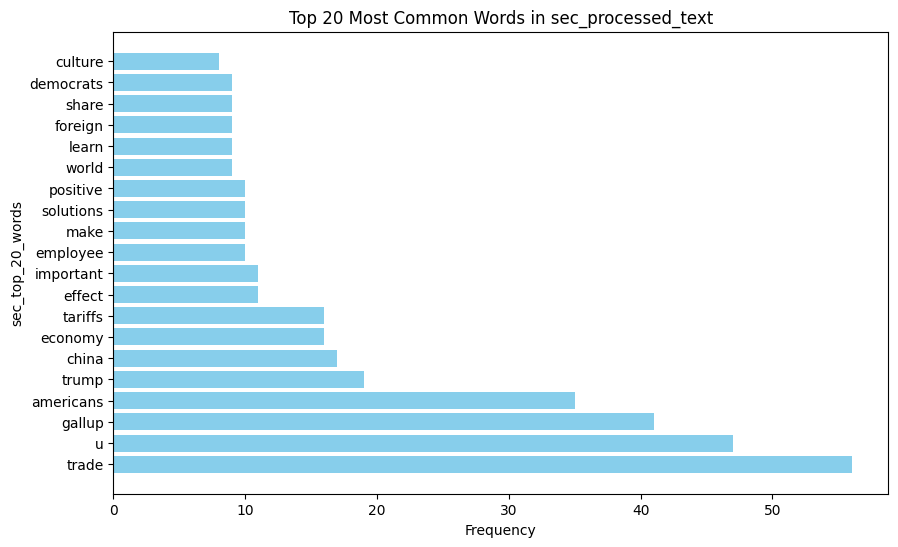

In [ ]:
# Tokenizer for sec_processed_text
tokenizer = RegexpTokenizer(r'\w+')

# Generate a horizontal bar plot for the top 20 words in 'sec_processed_text'
tokens_sec = tokenizer.tokenize(sec_processed_article)
word_counts_sec = Counter(tokens_sec)
top_words_sec = word_counts_sec.most_common(20)
words, frequencies = zip(*top_words_sec)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(words, frequencies, color='skyblue')
ax.set_xlabel('Frequency')
ax.set_ylabel('sec_top_20_words')
ax.set_title('Top 20 Most Common Words in sec_processed_text')

plt.show()

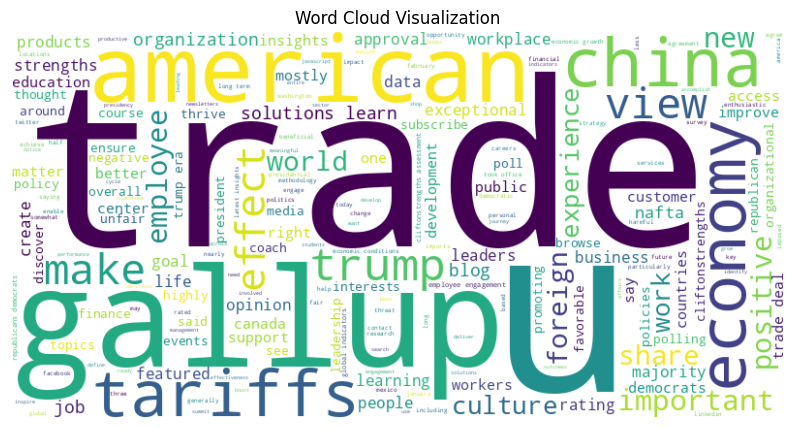

In [ ]:
# Generate Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(sec_processed_article)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Visualization')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


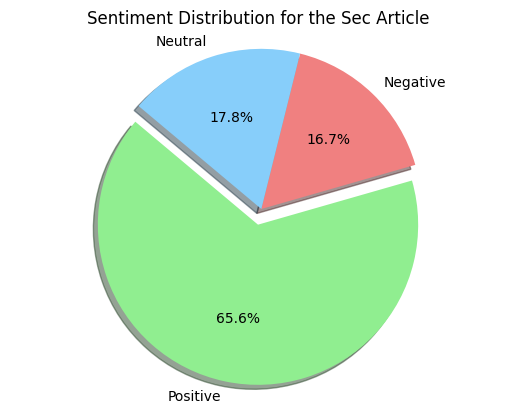

In [ ]:
# Download the required NLTK resource
nltk.download('punkt')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Tokenize the text into sentences
sec_sentences = sent_tokenize(sec_article)

# Calculate sentiment scores for each sentence
sec_sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in sec_sentences]

# Classify sentiments into positive, negative, and neutral
sec_positive = sum(score > 0.05 for score in sec_sentiment_scores)
sec_negative = sum(score < -0.05 for score in sec_sentiment_scores)
sec_neutral = len(sec_sentiment_scores) - sec_positive - sec_negative

# Plot a pie chart for sentiment distribution
sec_labels = 'Positive', 'Negative', 'Neutral'
sec_sizes = [sec_positive, sec_negative, sec_neutral]
sec_colors = ['lightgreen', 'lightcoral', 'lightskyblue']
sec_explode = (0.1, 0, 0)

plt.pie(sec_sizes, explode=sec_explode, labels=sec_labels, colors=sec_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution for the Sec Article')
plt.show()


In [ ]:
df = pd.DataFrame({'Sentence': sec_sentences, 'Sentiment Score': sec_sentiment_scores})

print(df)

                                             Sentence  Sentiment Score
0   \n\n\n\n\n\n\r\n\tAmericans' Views on Trade in...           0.0000
1                    Please Enable JavaScript Safely.           0.6705
2   skip to main content\n\n\n\n\n\nAbout Us\nLoca...           0.8074
3   Employee Experience\nAnalyze and improve the e...           0.4404
4   Leadership\nIdentify and enable future-ready l...           0.5719
..                                                ...              ...
85  EconomyJul 9, 2018\nAmericans Say China Trade ...          -0.3818
86  EconomyJul 26, 2018\nAmericans Say U.S.-China ...           0.4468
87  Polling MattersJul 24, 2019\nPresidential Cand...           0.5994
88  October 25, 2019\n\nGallup  https://news.gallu...           0.4019
89  Cookie Preferences\nPrivacy Statement\nLegal\n...          -0.0997

[90 rows x 2 columns]


#2021: The Washington Post: ‘U.S. tariffs on Chinese goods didn’t bring companies back to the U.S., new research finds’

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Function for text preprocessing
def text_preprocessing(document_text):
    doc_text = document_text.lower()
    doc_text = re.sub(r'\d+', '', doc_text)
    doc_text = re.sub('\W+', ' ', doc_text)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_tokens)

    processed_text = re.sub(r'[^a-zA-Z\s]', '', processed_text)
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text

# URL of the new article
mid_url = "https://www.washingtonpost.com/politics/2021/09/22/us-tariffs-chinese-goods-didnt-bring-companies-back-us-new-research-finds/"

# Get HTML content
mid_response = requests.get(mid_url)
mid_html_string = mid_response.text

# Parse HTML content
mid_soup = BeautifulSoup(mid_html_string, 'html.parser')
mid_article = mid_soup.get_text()

# Preprocess text
mid_processed_article = text_preprocessing(mid_article)

# Display processed text
print(mid_processed_article)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


happened trade war washington post accessibility statementskip main contentdemocracy dies darknesssign inclockthis article published years agothe washington postdemocracy dies darknessmonkey cageu tariffs chinese goods bring companies back u new research findsthese tariffs instead resulted collateral damage u economyanalysis jiakun jack zhang samantha vorthermsseptember edtrolls finished steel seen u steel granite city works facility granite city ill june jeff roberson ap sharecomment storycommentadd saved storiessavetreasury secretary janet l yellen recently argued tariffs u china trade war covering billion worth goods hurt american consumers yet negotiations really address many ways fundamental problems china wpget full experience choose planarrowrightu tariffs chinese exports jumped sixfold tariffs failed decouple two economies biden administration conducts comprehensive review china trade policy contemplates new tariffs research helps explain whether existing tariffs achieved polic

In [ ]:
# Tokenize the processed text
tokens = mid_processed_article.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Calculate the total number of words
total_words = sum(word_counts.values())

# Calculate weights (for simplicity, using equal weights)
weights = {word: count*100 / total_words for word, count in word_counts.items()}

# Calculate weighted counts
weighted_counts = {word: count * weights[word] for word, count in word_counts.items()}

# Create a DataFrame from the word counts and add weighted columns
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
df_word_counts['Frequency'] = df_word_counts['Word'].map(weights)
df_word_counts['WeightedCount_percent'] = df_word_counts['Count'] * df_word_counts['Frequency']

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Display the top 20 words with weights and weighted counts
mid_top_20_words = df_word_counts.head(20)
print(mid_top_20_words)


               Word  Count  Frequency  WeightedCount_percent
25                u     39   4.665072             181.937799
62            china     35   4.186603             146.531100
19          tariffs     29   3.468900             100.598086
1             trade     18   2.153110              38.755981
2               war     13   1.555024              20.215311
196       political      9   1.076555               9.688995
20          chinese      8   0.956938               7.655502
148  multinationals      8   0.956938               7.655502
171         percent      7   0.837321               5.861244
124         economy      6   0.717703               4.306220
23        companies      6   0.717703               4.306220
27         research      6   0.717703               4.306220
3        washington      6   0.717703               4.306220
189           firms      6   0.717703               4.306220
201            exit      5   0.598086               2.990431
223      businesses     

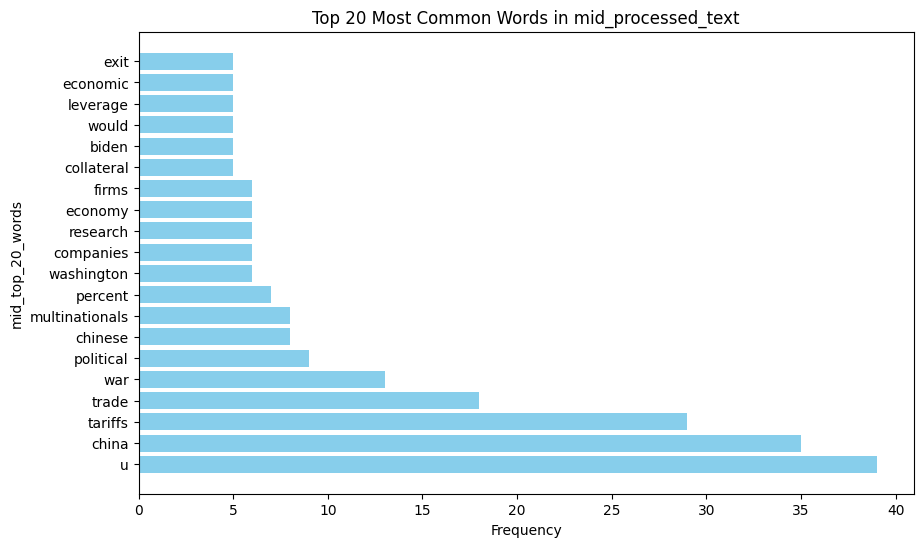

In [ ]:
# Tokenizer for mid_processed_text
tokenizer = RegexpTokenizer(r'\w+')

# Generate a horizontal bar plot for the top 20 words in 'mid_processed_text'
tokens_mid = tokenizer.tokenize(mid_processed_article)
word_counts_mid = Counter(tokens_mid)
top_words_mid = word_counts_mid.most_common(20)
words, frequencies = zip(*top_words_mid)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(words, frequencies, color='skyblue')
ax.set_xlabel('Frequency')
ax.set_ylabel('mid_top_20_words')
ax.set_title('Top 20 Most Common Words in mid_processed_text')

plt.show()


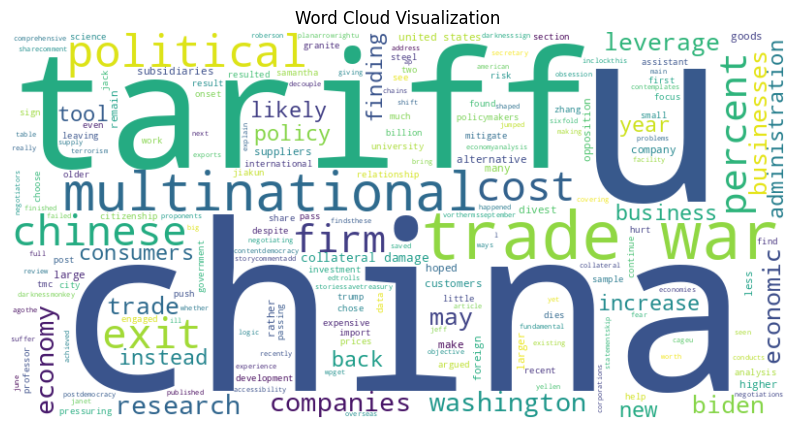

In [ ]:
# Generate Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(mid_processed_article)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Visualization')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


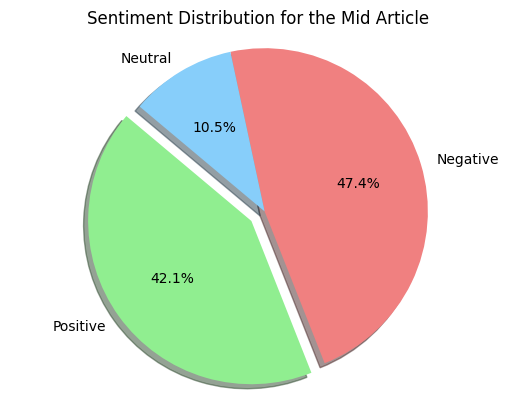

In [ ]:
# Download the required NLTK resource
nltk.download('punkt')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Tokenize the text into sentences
mid_sentences = sent_tokenize(mid_article)

# Calculate sentiment scores for each sentence
mid_sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in mid_sentences]

# Classify sentiments into positive, negative, and neutral
mid_positive = sum(score > 0.05 for score in mid_sentiment_scores)
mid_negative = sum(score < -0.05 for score in mid_sentiment_scores)
mid_neutral = len(mid_sentiment_scores) - mid_positive - mid_negative

# Plot a pie chart for sentiment distribution
mid_labels = 'Positive', 'Negative', 'Neutral'
mid_sizes = [mid_positive, mid_negative, mid_neutral]
mid_colors = ['lightgreen', 'lightcoral', 'lightskyblue']
mid_explode = (0.1, 0, 0)

plt.pie(mid_sizes, explode=mid_explode, labels=mid_labels, colors=mid_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution for the Mid Article')
plt.show()


In [ ]:
df = pd.DataFrame({'Sentence': mid_sentences, 'Sentiment Score': mid_sentiment_scores})

print(df)

                                             Sentence  Sentiment Score
0                     What happened to the trade war?          -0.5994
1   - The Washington Post\nAccessibility statement...           0.0000
2   tariffs on Chinese goods didn’t bring companie...          -0.7184
3   (Jeff Roberson/AP)ShareComment on this storyCo...          -0.6597
4   tariffs on Chinese exports jumped sixfold betw...          -0.6652
5   As the Biden administration conducts its compr...           0.7096
6   The Trump administration’s logic was that tari...           0.2732
7   Tariff proponents argued the Chinese economy w...          -0.5574
8   Will the U.S. make China the next big obsessio...          -0.2878
9   Here’s why.AdvertisementThe U.S. hoped to see ...           0.3818
10  More than 1,800 U.S.-funded subsidiaries close...          -0.3818
11  U.S. company exits immediately after the onset...          -0.5390
12  And U.S. firms were no more likely to divest t...          -0.2960
13  In

#2022: The Wall Street Journal: ‘Who Won the U.S.-China Trade War?’

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Function for text preprocessing
def text_preprocessing(document_text):
    doc_text = document_text.lower()
    doc_text = re.sub(r'\d+', '', doc_text)
    doc_text = re.sub('\W+', ' ', doc_text)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_tokens)

    processed_text = re.sub(r'[^a-zA-Z\s]', '', processed_text)
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text

# URL of the new article
fou_url = "https://www.wsj.com/articles/who-won-the-u-s-china-trade-war-11653059611"

# Get HTML content
fou_response = requests.get(fou_url)
fou_html_string = fou_response.text

# Parse HTML content
fou_soup = BeautifulSoup(fou_html_string, 'html.parser')
fou_article = fou_soup.get_text()

# Preprocess text
fou_processed_article = text_preprocessing(fou_article)

# Display processed text
print(fou_processed_article)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


page found skip main contentskip search wall street journalenglish editionenglish chinese japanese print editionvideoaudiolatest headlinesmore products wsjbuy side wsjwsj shopwsj winelatestworldtopicsafricaamericasasiachinaeuropemiddle eastindiaoceaniarussiau k moresciencearchaeologybiologyenvironmentphysicsspace astronomyworld videoobituariesbusinesstopicsairlinesautosc suitedealsearningsenergy oilentrepreneurshiptelecomretailhospitalitylogisticsmediac suitecfo journalcio journalcmo todaylogistics reportrisk compliancewsj professionalwsj pro bankruptcywsj pro central bankingwsj pro cybersecuritywsj pro private equitywsj pro sustainable businesswsj pro venture capitalmoreheard streetjournal reportsbusiness videobusiness podcastu topicsclimate environmenteducationlawcollege rankings moreu videowhat news podcastpoliticstopicselectionsnational securitypolicymorepolitics videoeconomytopicscentral bankingconsumershousingjobstradeglobalwsj professionalwsj pro bankruptcywsj pro central bankin

In [ ]:
import pandas as pd
from collections import Counter

# Tokenize the processed text
tokens = fou_processed_article.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Calculate the total number of words
total_words = sum(word_counts.values())

# Calculate weights (for simplicity, using equal weights)
weights = {word: count * 100 / total_words for word, count in word_counts.items()}

# Calculate weighted counts
weighted_counts = {word: count * weights[word] for word, count in word_counts.items()}

# Create a DataFrame from the word counts and add weighted columns
df_word_counts = pd.DataFrame(word_counts.items(), columns=['fou_Word', 'fou_Count'])
df_word_counts['fou_Weight'] = df_word_counts['fou_Word'].map(weights)
df_word_counts['WeightedCount_percent'] = df_word_counts['fou_Count'] * df_word_counts['fou_Weight']

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='fou_Count', ascending=False)

# Display the top 20 words with weights and weighted counts
fou_top_20_words = df_word_counts.head(20)
print(fou_top_20_words)

              fou_Word  fou_Count  fou_Weight  WeightedCount_percent
35                 pro         20    3.478261              69.565217
68                tech          6    1.043478               6.260870
0                 page          4    0.695652               2.782609
86            investor          4    0.695652               2.782609
91  saundersstreetwise          4    0.695652               2.782609
90               laura          4    0.695652               2.782609
89              report          4    0.695652               2.782609
88            zweigtax          4    0.695652               2.782609
87               jason          4    0.695652               2.782609
85         intelligent          4    0.695652               2.782609
40             private          4    0.695652               2.782609
44             venture          4    0.695652               2.782609
34     professionalwsj          4    0.695652               2.782609
36       bankruptcywsj          4 

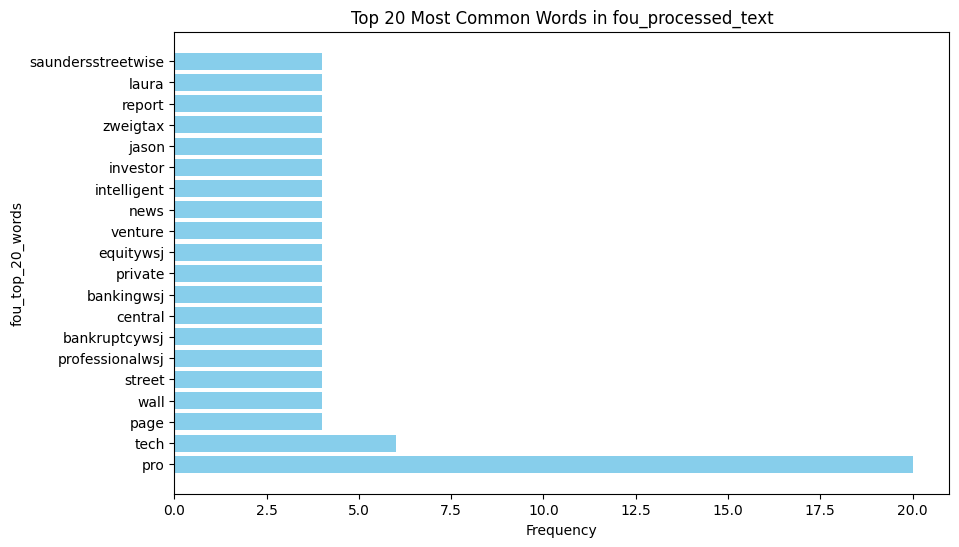

In [ ]:
# Tokenizer for fou_processed_text
tokenizer = RegexpTokenizer(r'\w+')

# Generate a horizontal bar plot for the top 20 words in 'fou_processed_article'
tokens_fou = tokenizer.tokenize(fou_processed_article)
word_counts_fou = Counter(tokens_fou)
top_words_fou = word_counts_fou.most_common(20)
words, frequencies = zip(*top_words_fou)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(words, frequencies, color='skyblue')
ax.set_xlabel('Frequency')
ax.set_ylabel('fou_top_20_words')
ax.set_title('Top 20 Most Common Words in fou_processed_text')

plt.show()


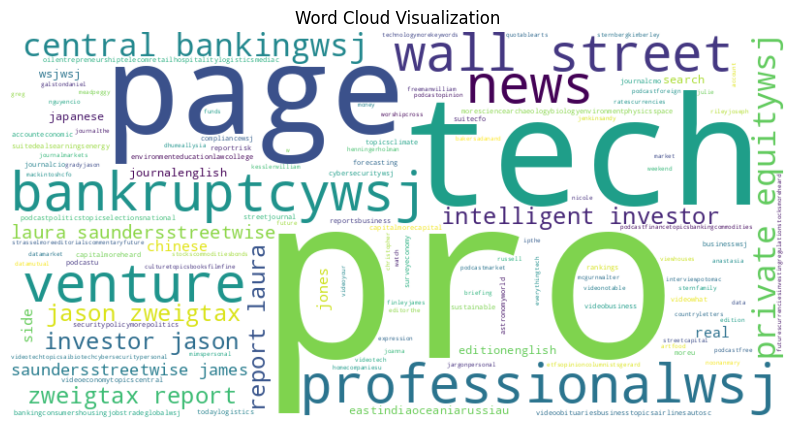

In [ ]:
# Generate Word Cloud Visualization for fou_processed_text
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(fou_processed_article)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Visualization')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


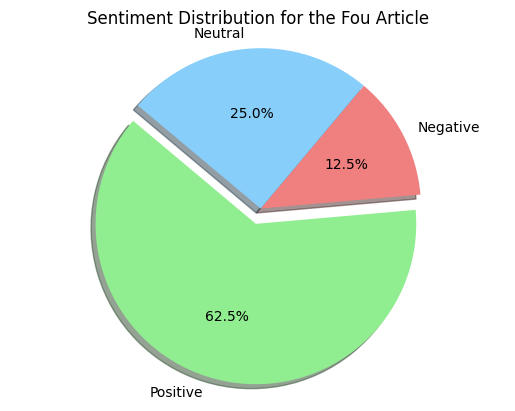

In [ ]:
# Download the required NLTK resource
nltk.download('punkt')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Tokenize the text into sentences
fou_sentences = sent_tokenize(fou_article)

# Calculate sentiment scores for each sentence
fou_sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in fou_sentences]

# Classify sentiments into positive, negative, and neutral
fou_positive = sum(score > 0.05 for score in fou_sentiment_scores)
fou_negative = sum(score < -0.05 for score in fou_sentiment_scores)
fou_neutral = len(fou_sentiment_scores) - fou_positive - fou_negative

# Plot a pie chart for sentiment distribution
fou_labels = 'Positive', 'Negative', 'Neutral'
fou_sizes = [fou_positive, fou_negative, fou_neutral]
fou_colors = ['lightgreen', 'lightcoral', 'lightskyblue']
fou_explode = (0.1, 0, 0)

plt.pie(fou_sizes, explode=fou_explode, labels=fou_labels, colors=fou_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution for the Fou Article')
plt.show()

In [ ]:
df = pd.DataFrame({'Sentence': fou_sentences, 'Sentiment Score': fou_sentiment_scores})

print(df)

                                            Sentence  Sentiment Score
0  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...           0.0000
1  VideoWhat's News PodcastPoliticsTopicsElection...           0.4588
2  StocksCommoditiesBonds & RatesCurrencies Marke...           0.4588
3  VideoWhat's News PodcastPoliticsTopicsElection...           0.4588
4  StocksCommoditiesBonds & RatesCurrencies Marke...           0.4588
5  If you typed the URL into your browser, check ...           0.0000
6  If you reached this page via our site or searc...          -0.1027
7  Retail Sales Up in November, in Surprise to Ec...           0.7269


#2023: Morning Consult: ‘U.S.-China Relations Barometer’

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Function for text preprocessing
def text_preprocessing(document_text):
    doc_text = document_text.lower()
    doc_text = re.sub(r'\d+', '', doc_text)
    doc_text = re.sub('\W+', ' ', doc_text)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(doc_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_tokens)

    processed_text = re.sub(r'[^a-zA-Z\s]', '', processed_text)
    processed_text = re.sub(r'\s+', ' ', processed_text)

    return processed_text

# URL of the new article
thr_url = "https://pro.morningconsult.com/trackers/tracking-us-china-relations"

# Get HTML content
thr_response = requests.get(thr_url)
thr_html_string = thr_response.text

# Parse HTML content
thr_soup = BeautifulSoup(thr_html_string, 'html.parser')
thr_article = thr_soup.get_text()

# Preprocess text
thr_processed_article = text_preprocessing(thr_article)

# Display processed text
print(thr_processed_article)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tracking public opinion current u china relationsindustriestopicsnewsletters sign subscribein trackercountry perceptionsthe new cold war contextmilitary economic tensionssource dataupdated nov updates quarterlyu china relations barometerkey metrics current state bilateral affairsmorning consult logodata reflects aggregate shares indicating whether respondents view specified country somewhat favorably somewhat unfavorably jason mcmann scott moskowitzsharesharein trackercountry perceptionsthe new cold war contextmilitary economic tensionssource data backdrop multiyear trade war heightened screening cross border investments persistent tensions south china sea taiwan morning consult u china relations barometer provides data driven insights public perceptions bilateral relations two superpowers well risks opportunities lie ahead companies investors barometer tracks american chinese sentiment bilateral relations across variety domains including country views whether locked cold war likelihoo

In [ ]:
# Tokenize the processed text
tokens = thr_processed_article.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Calculate the total number of words
total_words = sum(word_counts.values())

# Calculate weights (for simplicity, using equal weights)
weights = {word: count*100 / total_words for word, count in word_counts.items()}

# Calculate weighted counts
weighted_counts = {word: count * weights[word] for word, count in word_counts.items()}

# Create a DataFrame from the word counts and add weighted columns
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
df_word_counts['Weight'] = df_word_counts['Word'].map(weights)
df_word_counts['WeightedCount_percent'] = df_word_counts['Count'] * df_word_counts['Weight']

# Sort the DataFrame by count in descending order
df_word_counts = df_word_counts.sort_values(by='Count', ascending=False)

# Display the top 20 words with weights and weighted counts
thr_top_20_words = df_word_counts.head(20)
print(thr_top_20_words)


             Word  Count    Weight  WeightedCount_percent
27        consult     18  2.623907              47.230321
5           china     18  2.623907              47.230321
112        adults     15  2.186589              32.798834
4               u     13  1.895044              24.635569
45           data     13  1.895044              24.635569
76        chinese     13  1.895044              24.635569
59        morning     11  1.603499              17.638484
13            war      8  1.166181               9.329446
15       economic      8  1.166181               9.329446
37        country      7  1.020408               7.142857
55       tensions      7  1.020408               7.142857
21      relations      7  1.020408               7.142857
31         shares      6  0.874636               5.247813
35           view      6  0.874636               5.247813
12           cold      6  0.874636               5.247813
113        united      6  0.874636               5.247813
114        sta

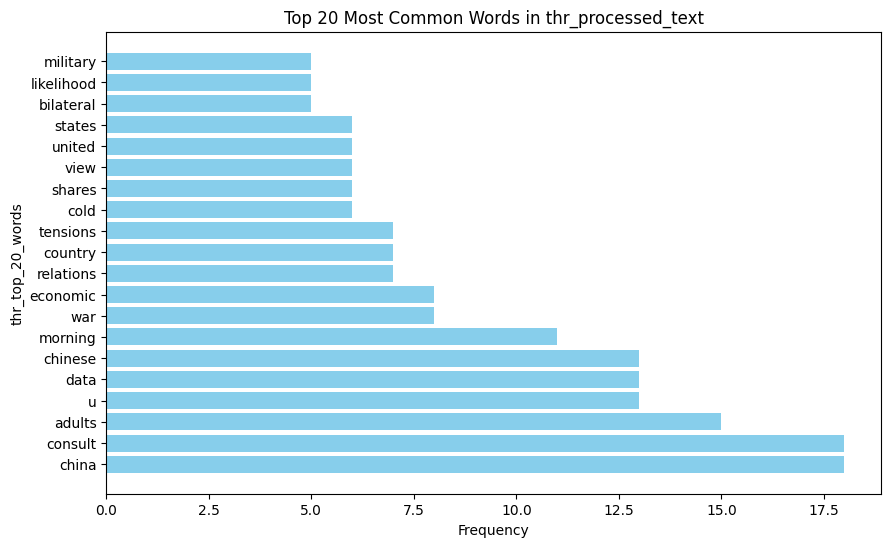

In [ ]:
# Tokenizer for thr_processed_text
tokenizer = RegexpTokenizer(r'\w+')

# Generate a horizontal bar plot for the top 20 words in 'thr_processed_article'
tokens_thr = tokenizer.tokenize(thr_processed_article)
word_counts_thr = Counter(tokens_thr)
top_words_thr = word_counts_thr.most_common(20)
words, frequencies = zip(*top_words_thr)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(words, frequencies, color='skyblue')
ax.set_xlabel('Frequency')
ax.set_ylabel('thr_top_20_words')
ax.set_title('Top 20 Most Common Words in thr_processed_text')

plt.show()


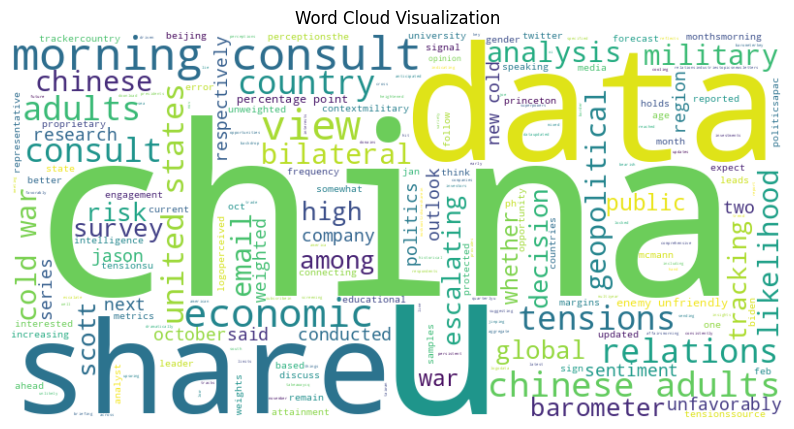

In [ ]:
# Generate Word Cloud Visualization for thr_processed_text
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(thr_processed_article)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Visualization')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


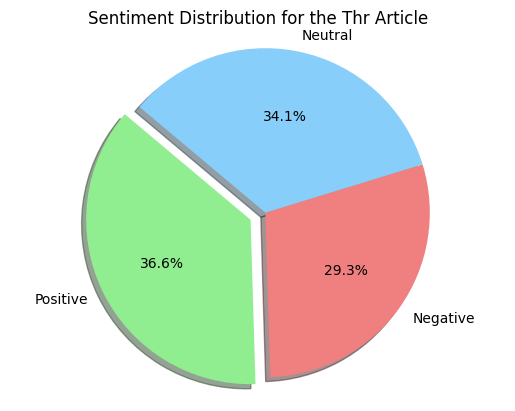

In [ ]:
# Download the required NLTK resource
nltk.download('punkt')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Tokenize the text into sentences
thr_sentences = sent_tokenize(thr_article)

# Calculate sentiment scores for each sentence
thr_sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in thr_sentences]

# Classify sentiments into positive, negative, and neutral
thr_positive = sum(score > 0.05 for score in thr_sentiment_scores)
thr_negative = sum(score < -0.05 for score in thr_sentiment_scores)
thr_neutral = len(thr_sentiment_scores) - thr_positive - thr_negative

# Plot a pie chart for sentiment distribution
thr_labels = 'Positive', 'Negative', 'Neutral'
thr_sizes = [thr_positive, thr_negative, thr_neutral]
thr_colors = ['lightgreen', 'lightcoral', 'lightskyblue']
thr_explode = (0.1, 0, 0)

plt.pie(thr_sizes, explode=thr_explode, labels=thr_labels, colors=thr_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution for the Thr Article')
plt.show()


In [ ]:
df = pd.DataFrame({'Sentence': thr_sentences, 'Sentiment Score': thr_sentiment_scores})

print(df)

                                             Sentence  Sentiment Score
0   Tracking Public Opinion of Current U.S.-China ...          -0.8402
1   The barometer tracks American and Chinese sent...          -0.7650
2   Download our latest report for a comprehensive...           0.2500
3   Key TakeawaysQ4 2023 outlook: Chinese sentimen...           0.0000
4   On the one hand, the share of Chinese adults w...           0.3400
5   But the share who view America unfavorably as ...           0.6486
6       The U.S. public is more consistently bearish.           0.0000
7   The share of U.S. adults who view China as an ...          -0.4404
8   The share who view China unfavorably (61%) is ...           0.2960
9   Views on whether Washington and Beijing are in...          -0.4019
10  Collectively these metrics signal some Chinese...          -0.0799
11  All the more so, heading into the 2024 U.S. el...          -0.5423
12  Allies or Enemies?Shares of adults in China an...          -0.5661
13  an

#Compare sentiment score of each article

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Articles
articles = {
    'fir': fir_processed_article,
    'sec': sec_processed_article,
    'mid': mid_processed_article,
    'thr': thr_processed_article,
    'fou': fou_processed_article
}

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Initialize an empty list to store sentiment scores for each article
all_sentiment_scores = []

# Loop through each article
for article_name, article_text in articles.items():
    # Tokenize the text into sentences
    sentences = sent_tokenize(article_text)

    # Calculate sentiment scores for each sentence
    sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Combine sentences with their corresponding sentiment scores
    sentence_sentiment = list(zip(sentences, sentiment_scores))

    # Create a DataFrame for the sentiment scores of the current article
    df_sentiment = pd.DataFrame(sentence_sentiment, columns=['Sentence', 'Sentiment Score'])

    # Display the DataFrame for the current article
    print(f"Table of Sentiment Scores for {article_name.capitalize()} Article:")
    print(df_sentiment.head(10))  # Displaying the top 10 rows for illustration
    print("\n")

    # Append sentiment scores of the current article to the overall list
    all_sentiment_scores.append({'Article': article_name, 'Sentiment Scores': sentiment_scores})

# Create a DataFrame for overall sentiment scores
df_all_sentiment_scores = pd.DataFrame(all_sentiment_scores)

# Display the DataFrame for overall sentiment scores
print("Overall Table of Sentiment Scores:")
print(df_all_sentiment_scores)


Table of Sentiment Scores for Fir Article:
                                            Sentence  Sentiment Score
0  americans approve trump trade policies cnbc am...           0.9978


Table of Sentiment Scores for Sec Article:
                                            Sentence  Sentiment Score
0  americans views trade trump era notice javascr...           0.9998


Table of Sentiment Scores for Mid Article:
                                            Sentence  Sentiment Score
0  happened trade war washington post accessibili...          -0.9942


Table of Sentiment Scores for Thr Article:
                                            Sentence  Sentiment Score
0  tracking public opinion current u china relati...           0.9383


Table of Sentiment Scores for Fou Article:
                                            Sentence  Sentiment Score
0  page found skip main contentskip search wall s...           0.9643


Overall Table of Sentiment Scores:
  Article Sentiment Scores
0     fir    

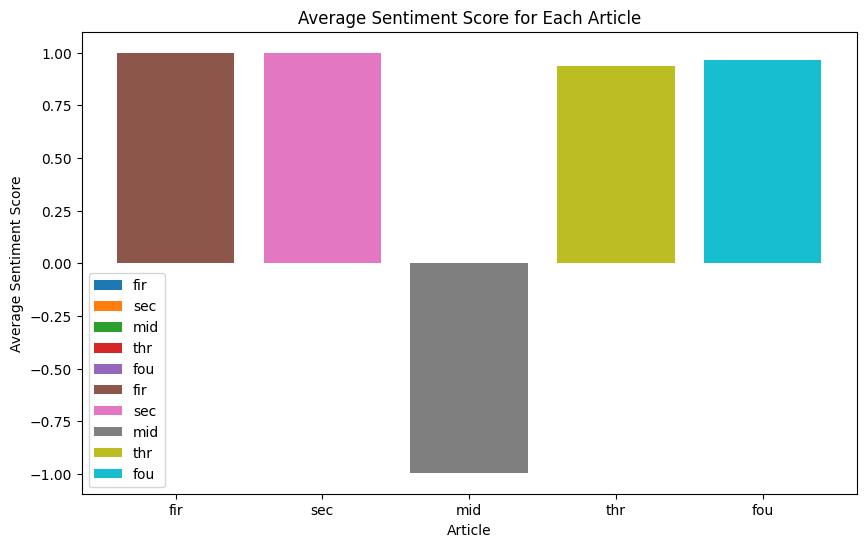

In [ ]:
# Loop through each article
for article_name, article_text in articles.items():
    # Tokenize the text into sentences
    sentences = sent_tokenize(article_text)

    # Calculate sentiment scores for each sentence
    sentiment_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

    # Append sentiment scores of the current article to the overall list
    all_sentiment_scores.append({'Article': article_name, 'Sentiment Scores': sentiment_scores})

# Create a DataFrame for overall sentiment scores
df_all_sentiment_scores = pd.DataFrame(all_sentiment_scores)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
for index, row in df_all_sentiment_scores.iterrows():
    plt.bar(row['Article'], sum(row['Sentiment Scores']) / len(row['Sentiment Scores']), label=row['Article'])

plt.title('Average Sentiment Score for Each Article')
plt.xlabel('Article')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

# Results
## Word Frequency Counts and Word Cloud Visualization
The analysis of word cloud visualization and word frequency tables unveiled prominent themes and key terms associated with the public's perception of the US-China trade war within the scrutinized news articles. In the 2019 article, frequently recurring words included "credit," "loans," "economic," and "market," which were similarly present in the 2020 article. Additionally, the 2020 article introduced significant terms like "economy," "solution," and "share."
The 2021 article highlighted terms such as "exit," "economic," "leverage," "collateral," "firms," "economy," and "multinationals" as the most frequently used. The 2022 article featured terms like "report," "investor," "intelligent," "venture," "equity," "bankrupt," and "tech" as the most frequent. Notably, the 2023 article predominantly mentioned terms such as "bilateral," "states," "cold," "tensions," "economic," and "data."
This thorough analysis offers valuable insights into the changing narrative surrounding the US-China trade war, uncovering shifts in emphases and focal points over the studied years. Nevertheless, a clear trend emerges from the vocabulary, indicating an overall negative sentiment towards the trade war. The majority of terms used seem to depict the adverse impact of the trade war on both individuals and businesses.

## Sentiment Analysis
Over the period from 2019 to 2023, there has been a discernible evolution in the sentiment distribution within news articles addressing the public attitude towards the US-China trade war. In 2019, the sentiment scores indicated a predominantly positive outlook at 52.4%, with a substantial proportion of articles conveying negative sentiment at 28.6%, and a remaining 19% classified as neutral. The following year, 2020, witnessed a significant shift towards a more positive sentiment, with positive scores soaring to 65.6% and a concurrent decrease in negative sentiment to 16.7%. However, 2021 marked a substantial change, characterized by a decline in positive sentiment to 42.1% and a notable surge in negative sentiment to 47.4%, while the neutral sentiment remained at 10.5%. The year 2022 showed a resurgence of positive sentiment at 62.5%, a decrease in negative sentiment to 12.5%, and a quarter of the articles maintaining a neutral stance. In 2023, the sentiment landscape underwent further adjustments, with positive sentiment decreasing to 36.6%, negative sentiment slightly increasing to 29.3%, and a notable rise in neutral sentiment to 34.1%. These shifts in sentiment distribution reflect the dynamic and evolving nature of public perception regarding the US-China trade war over the years.

# Discussion

## Trend of the Emphasis In News Article

The comprehensive analysis of word cloud visualizations and word frequency tables provides a nuanced understanding of the evolving emphasis in news articles on the public's attitude toward the US-China trade war from 2019 to 2023. The recurring terms in the 2019 and 2020 articles, such as "credit," "loans," and "economic," suggest a continuity in highlighting financial aspects and market dynamics. The introduction of terms like "economy," "solution," and "share" in the 2020 article indicates a growing focus on potential resolutions and economic implications. The subsequent shift in 2021 towards terms like "exit," "leverage," and "multinationals" suggests an increased emphasis on strategic considerations and the impact on multinational corporations.

In 2022, terms like "report," "investor," and "tech" become prominent, potentially reflecting a heightened focus on the technological and financial sectors. Notably, the 2023 article introduces terms like "bilateral," "states," and "tensions," suggesting a shift towards geopolitical considerations and heightened international tensions.

Despite the diverse thematic emphases across the years, a consistent trend emerges, revealing an overall negative sentiment towards the US-China trade war. The prevalent use of terms depicting adverse consequences on individuals and businesses underscores the widespread concern about the detrimental effects of the trade war. This linguistic analysis provides valuable insights into the evolving narrative, shedding light on the multifaceted dimensions of public perception and sentiment surrounding this significant geopolitical and economic issue.

## Sentiment score distribution

The fluctuating sentiment distribution in news articles concerning the US-China trade war from 2019 to 2023 suggests a complex interplay of factors shaping public perception. The surge in positive sentiment in 2020 could be attributed to global circumstances, particularly the onset of the COVID-19 pandemic, which prompted nations to seek cooperation and stability in economic relations. However, the substantial shift in 2021 towards a predominantly negative sentiment implies a departure from the initial optimism, possibly influenced by escalating tensions in political relations between the two countries. The revival of positive sentiment in 2022 may be indicative of diplomatic efforts or economic developments that eased concerns. Notably, the distribution in 2023 hints at a nuanced perspective, with decreased positivity, a slight increase in negativity, and a considerable rise in neutral sentiment. This may be linked to ongoing geopolitical tensions, the persistent impact of the pandemic, and the worsening conditions faced by individuals due to the prolonged trade war. In essence, the sentiment dynamics reflect the intricate intersections of economic, political, and public health factors in shaping attitudes towards the US-China trade war.

## Result of the average sentiment score comparsion of five article

The analysis of the average sentiment scores across the five articles reveals varying degrees of positivity and negativity within the sampled content. While the first and second articles exhibit highly positive sentiment scores of 0.9978 and 0.9998, respectively, indicating a strongly positive tone, the third article portrays a contrasting sentiment with a significantly negative score of -0.9942. The fourth and fifth articles, with scores of 0.9383 and 0.9643, respectively, fall within the positive spectrum but exhibit a lesser degree of positivity compared to the first two articles.
However, it is crucial to acknowledge the inherent challenges and limitations of sentiment analysis on news articles. News reporting often involves nuanced language, subjective interpretations, and diverse tones, making it challenging to capture the full context and sentiment accurately. Additionally, the presence of sarcasm, irony, or subtle nuances in news articles can pose difficulties for sentiment analysis tools in providing precise assessments. Therefore, while sentiment analysis offers valuable insights into the overall tone of news articles, we must interpret the results with caution and consider the contextual complexities inherent in news reporting.

# Conclusion
In conclusion, this analysis This analysis of the sentiment of news articles on public attitude towards the US-China trade war from 2019 to 2023 using NLTK, sentiment analysis, and word cloud visualizations reveals a predominantly negative sentiment form the public while the sentiment score of the news articles are maily positive. The utilization of word cloud visualizations and word frequency tables has allowed for a nuanced exploration of evolving themes and emphases within news articles over the years. Despite the diverse emphases, a consistent trend of overall negative sentiment towards the US-China trade war emerged. While acknowledging the limitations of sentiment analysis in capturing nuanced language and subjective interpretations in news reporting, the project highlights the valuable insights derived from examining the multifaceted dimensions of  articles delivery of public perception and sentiment surrounding this significant geopolitical and economic issue.


# Future Scope of Work:

1. **Scale and Diversity of Dataset:** Expand the analysis to a larger and more diverse dataset, encompassing a broader range of news articles from various sources. This expansion could provide a more comprehensive view of public sentiment and potentially identify additional nuances in the discourse surrounding the US-China trade war.

2. **Longitudinal Analysis:** Conduct a longitudinal study by continuously capturing news articles from the same sources over an extended period. This approach would facilitate the tracking of evolving trends and sentiments over time, offering deeper insights into the long-term dynamics of public attitudes towards the trade war.

3. **Multimodal Analysis:** Incorporate multimodal elements, such as images and videos, in addition to text analysis. This approach can provide a more holistic understanding of how visual content complements or contrasts with textual sentiments in news articles.

4. **Semantic Analysis:** Enhance the analysis by incorporating advanced semantic analysis techniques besides NLTK to better capture the contextual meanings and subtleties in the language used in news articles. This could contribute to a more nuanced interpretation of sentiment.

5. **Geographical Considerations:** Explore the geographical variations in public sentiment by analyzing articles from different regions. This could unveil regional perspectives and variations in how the US-China trade war is perceived across the globe.

# Limitations of the Project:

1. **Sample Size and Selection:** The study analyzed a relatively small sample of articles, which may limit the generalizability of the findings. A larger dataset would provide a more representative picture of public sentiment.

2. **Source Dependence:** Although the articles were selected from authoritative newspaper institutions, variations in reporting styles and biases inherent in different sources may introduce some degree of error or bias into the analysis.

3. **Sensitivity to Sentiment Analysis Tools:** The accuracy of sentiment analysis tools may be influenced by the inherent subjectivity of language, making it challenging to precisely capture the sentiment expressed in news articles.

4. **Lack of Contextual Understanding:** The project primarily focused on quantitative analyses of word frequencies and sentiment scores, lacking the depth of contextual understanding that qualitative analyses or expert opinions could provide.